# LunarLander-v2 environment

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import tqdm

plt.ion()

In [2]:
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
State shape:  (8,)
Number of actions:  4


In [3]:
from dqn_agent import Agent

agent = Agent(state_size=8, action_size=4, seed=0)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


  0%|                                                                         | 0/2000 [00:00<?, ?it/s, avg_score=-328]

  5%|███▏                                                           | 100/2000 [00:21<06:41,  4.73it/s, avg_score=-218]

 10%|██████▎                                                        | 200/2000 [01:22<12:26,  2.41it/s, avg_score=-153]

 15%|█████████▍                                                     | 300/2000 [04:25<25:04,  1.13it/s, avg_score=-113]

 20%|████████████▍                                                 | 400/2000 [08:36<34:26,  1.29s/it, avg_score=-95.7]

 25%|███████████████▌                                              | 500/2000 [12:23<37:11,  1.49s/it, avg_score=-39.5]

 30%|██████████████████▉                                            | 600/2000 [16:13<37:50,  1.62s/it, avg_score=18.4]

 35%|██████████████████████▍                                         | 700/2000 [17:51<33:09,  1.53s/it, avg_score=158]

 40%|█████████████████████████▌                                      | 800/2000 [18:55<28:22,  1.42s/it, avg_score=151]

 45%|████████████████████████████▊                                   | 900/2000 [20:14<24:44,  1.35s/it, avg_score=156]

 50%|███████████████████████████████▌                               | 1000/2000 [21:41<21:41,  1.30s/it, avg_score=150]

 55%|██████████████████████████████████▋                            | 1100/2000 [22:56<18:46,  1.25s/it, avg_score=164]

 60%|█████████████████████████████████████▊                         | 1200/2000 [24:06<16:04,  1.21s/it, avg_score=175]

 65%|████████████████████████████████████████▉                      | 1300/2000 [25:10<13:33,  1.16s/it, avg_score=165]

 70%|████████████████████████████████████████████                   | 1400/2000 [26:10<11:12,  1.12s/it, avg_score=172]

 75%|███████████████████████████████████████████████▎               | 1500/2000 [27:06<09:02,  1.08s/it, avg_score=185]

 78%|█████████████████████████████████████████████████▏             | 1561/2000 [27:42<07:47,  1.06s/it, avg_score=200]


Environment solved in 1461 episodes!	Average Score: 200.47


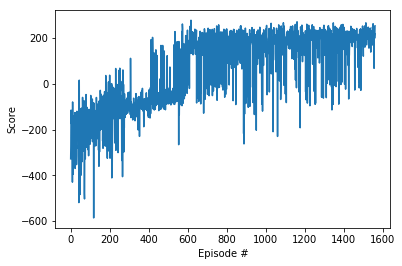

In [4]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    with tqdm.trange(0, n_episodes) as t:
        for i_episode in t:
            state = env.reset()
            score = 0
            for _ in range(max_t):
                action = agent.act(state, eps)
                next_state, reward, done, _ = env.step(action)
                agent.step(state, action, reward, next_state, done)
                state = next_state
                score += reward
                if done:
                    break 
                    
            scores_window.append(score)       # save most recent score
            scores.append(score)              # save most recent score
            eps = max(eps_end, eps_decay*eps) # decrease epsilon
            t.set_postfix(avg_score=np.mean(scores_window))
            if i_episode % 100 == 0:
                print('')
            if np.mean(scores_window)>=200.0:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
                break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

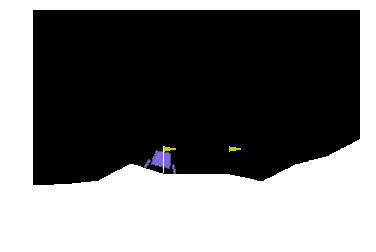

In [9]:
# load the weights from file
# agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(10):
    state = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    for j in range(200):
        action = agent.act(state)
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()